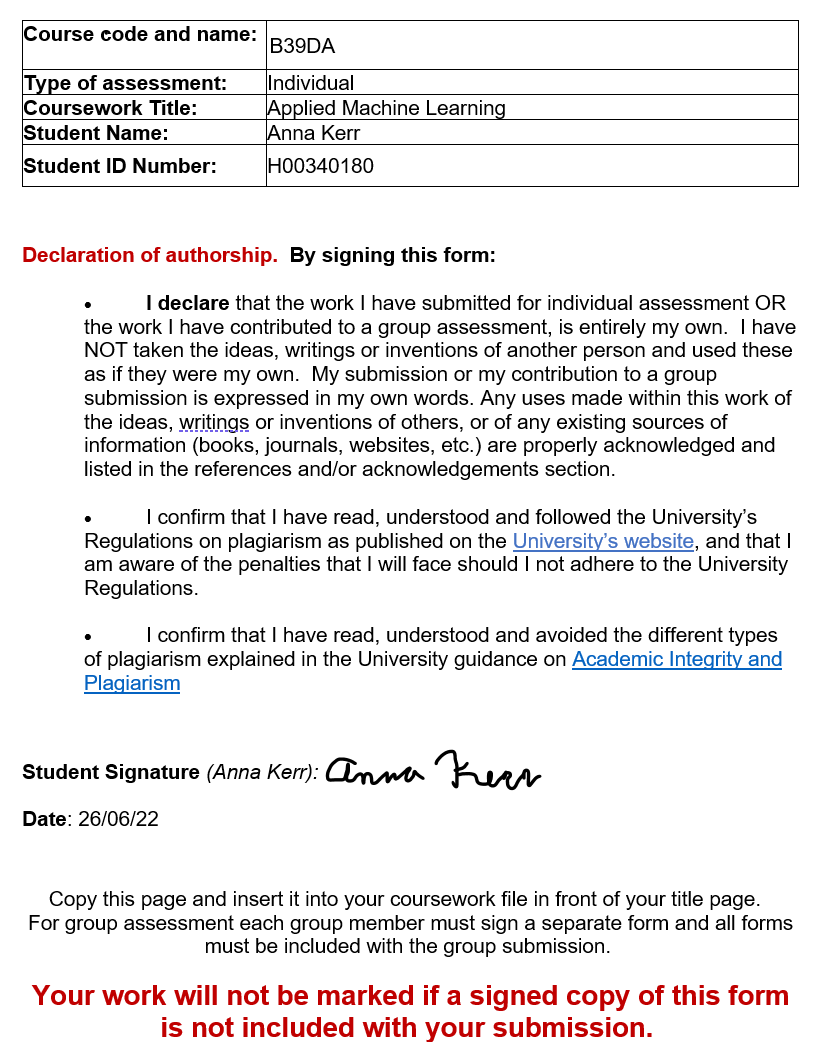

# INTRODUCTION

## Background

I work for Barclays, a multinational bank and financial service company. Barclays provides everyday clients and small business retail banking services, such as mortgages and bank accounts, as well as corporate and investment banking services to their larger business clients and institutions (Barclays, 2019). As a large financial institution Barclays is exposed to  quite a bit of risk. One of the major risks facing the banking sector today is Fraud, as fraudsters illicitly try to access and steal customers money. 

As digital banking and payments increase, fraudsters are creatively finding new ways to steal from banks and their customers. Criminals trick victims into making security mistakes and providing sensitive information. This can be done through impersonation scams where texts, phone calls and emails impersonating trusted organisations or acquaintances (Worobec, 2021). Criminals are also using Search Engine Optimisation to fake comparison websites to drive customers to cloned scam website. Fraud is a huge problem in banking. In the UK, unauthorised financial fraud losses across payment cards, remote banking and cheques were £783.8 million in 2020 (Worobec, 2021). Fraud also leads to irredeemable damage to a bank’s reputation as banks lose their customers trust, and business, when their services aren’t deemed safe and secure. Thus, Barclays has a very strong incentive to ensure that fraudulent transactions do not go through.

## Problem to be Solved Using Machine Learning

Barclays is looking to use machine learning to categorise transactions as either fraudulent or non-fraudulent in order to prevent the fraudulent transactions from going through.

## Dataset

Due to Barclays strict confidentiality policy I’m not able to use Barclays data to build a machine learning model for this assignment. I plan to use the Synthetic Financial Datasets For Fraud Detection dataset (LOPEZ-ROJAS, 2016) found on Kaggle since it is representative of normal banking transactions and classifies each transactions as fraudulent or non-fraudulent. Having each transaction labelled as fraudulent or non-fraudulent allows me to me to train the model, then validate the model by testing it on unseen test data.

The dataset was generated using the simulator called PaySim. PaySim uses aggregated data from a private dataset to generate a synthetic dataset that resembles the normal operation transactions (LOPEZ-ROJAS, 2016).

In this specific dataset the fraudsters trys to profit by taking control or customers’ accounts and then emptying the funds by transferring the customers entire bank balance to another account and then cashing out of the system (LOPEZ-ROJAS, 2016).

Below gives a description of the columns in the dataset taken from LOPEZ-ROJAS (2016):

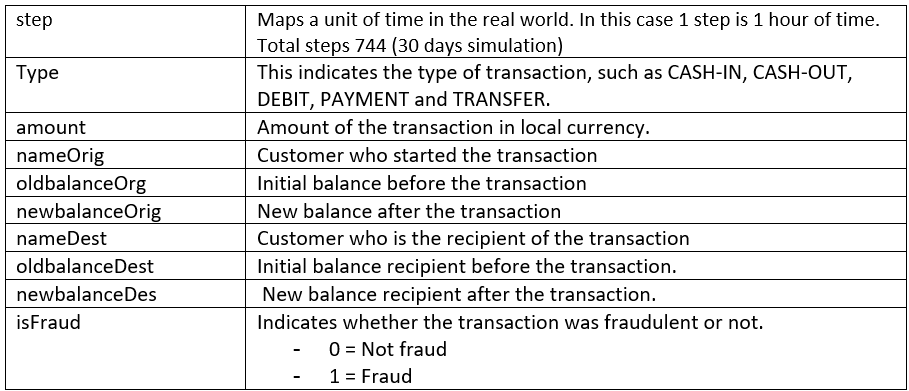

## Machine Learning Model

Based on the dataset and Barclays goal with the dataset this is a supervised classification problem. This is a supervised problem since each transaction is paired with a label/the desired output. Moreover, this is a classification problem since the goal is to sort the transactions into the two categories of fraudulent and non-fraudulent.

With supervised classification problems, the possible machine learning models to solve Barclays problem, as we have learned in class, could be logistic regression, decision tree, or random forest. There are various ways to go about deciding  which model to choose. I could test each one and pick the one with the highest accuracy. However, based on previous research I am going to pick random forest as it has been proven to work well with detecting fraud cases, and compared to other classification models has higher dimensionality and accuracy (Dogga, 2020). Random forest also runs well on large datasets, efficiently handles non-normal data, overfitting does not easily occur, it measures the importance of each variable, and can effectively eliminate unimportant variables (Liu et al., 2015).

# Methodology

Below are my steps in approaching building and then validating the random forest machine learning model:

1)	Explore/Describe the dataset to get a sense of the data and what I’m working with
2)	Prep the data for processing by dropping useless columns, looking for null values, normalizing the data, looking for correlated items, removing correlated items
3)	Split the data into training and testing
4)	Train the random forest model using the data set aside for training purposes
5)	Test the model on the unseen data set aside for testing purposes
6)	Validate the model’s accuracy by viewing the accuracy score and confusion matrix

# Import Libraries

In [1]:
# I am using these libraries to manage the dataset

# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
import numpy as np

# Pandas: used for data manipulation and analysis
import pandas as pd

# matplotlib: used for visualisation and plotting graph/image/etc
import matplotlib.pyplot as plt

# used for data visualisation
import seaborn as sns


# Dataset Import

In [2]:
Dataset = pd.read_csv("Fraud.csv")

# Describing the Data 

I start by observing the first 5 rows of the dataset to get a better understanding of the data.

When looking at the data the first thing I notice is that not all of the data is in a number format. For instance, type has the payment type spelled out, such as payment, transfer, cash out etc. This will cause a problem because most machine learning algorithms can only work with numerical attributes. The type of transaction could potentially be an important factor in determining the validity of a transaction. The categories in the ‘type’ column will need to be converted to a number.

I also notice that NamOrig and NameDest are the unique transaction name for each client, similar to a person’s name, which really has no effect on a fraudulent transaction. These columns are useless for the data and should be removed.


In [3]:
#This visualises the first 5 rows of the dataset
Dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## Converting Categorical Data to Numerical Data

Below I am using the code from (Geeksforgeeks, 2021) to use .LabelEncoder() from sklearn library to convert the categorical data in  'type' to numerical data. 

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
le = LabelEncoder()
label = le.fit_transform(Dataset['type'])
label

#(Geeksforgeeks, 2021)

array([3, 3, 4, ..., 3, 3, 3])

In [5]:
Dataset.drop("type", axis=1, inplace=True)
Dataset["type"] = label
Dataset

#(Geeksforgeeks, 2021)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,3
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,3
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,4
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,1
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,3
...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,1
1048571,95,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,3
1048572,95,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,3
1048573,95,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,3


## Rearranging Data

Below I am using the code posted by (Freddygv, 2014) as a stock overflow answer to re-arrange the dataset so that ‘type’ is put back in the same place after the conversion of the cell content to numerical data, since after the conversion it is put to the end after 'isFraud'.

In [6]:
Dataset = Dataset[['step', 'type','amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

#(Freddygv, 2014)

## Observing the Data after Updates

Below shows that the items in ‘type’ have successfully converted from categorial data to numerical data. Below shows their new labels:

cash_out = 1;
cash_in = 2;
payment = 3;
transfer = 4;
Debit = 5


In [7]:
#This visualises the first 5 rows of the dataset
Dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


Below shows a summary of descriprive statistics for each of the columns containing numeric information.

The total number of transactions in the dataset are 1,048,575. 

The aveage transaction (found in the'amount' column) is £158,667 with the lowest transaciont being £0.1 and the largest being £10,000,000. This shows a huge varaiety in transactions. Thus, the data will need to be normalized.

In [8]:
#The below shows a summary of descriprive statistics for each of the columns containing numeric information
print(Dataset.describe())

               step          type        amount  oldbalanceOrg  \
count  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean   2.696617e+01  1.713400e+00  1.586670e+05   8.740095e+05   
std    1.562325e+01  1.345007e+00  2.649409e+05   2.971751e+06   
min    1.000000e+00  0.000000e+00  1.000000e-01   0.000000e+00   
25%    1.500000e+01  1.000000e+00  1.214907e+04   0.000000e+00   
50%    2.000000e+01  1.000000e+00  7.634333e+04   1.600200e+04   
75%    3.900000e+01  3.000000e+00  2.137619e+05   1.366420e+05   
max    9.500000e+01  4.000000e+00  1.000000e+07   3.890000e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06    1.048575e+06  1.048575e+06  
mean     8.938089e+05    9.781600e+05    1.114198e+06  1.089097e-03  
std      3.008271e+06    2.296780e+06    2.416593e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00    0.000000e+00  

The below shows the set of unique values in the dataset. We can see for the type of transactions there are a lot of duplicates as there are 1,048,575 entries being recorded, but only 5 types. This makes sense since there are only 5 categories in the ‘type’ column. In a data set there is expected to be some duplication.

For the ‘amount’ column we can see that there are quite a bit of unique values of 1,009,606 out of 1,048,575 transactions. Most of the transactions appear to be from a unique customer since there are 1,048,317 ‘nameOrig’ or unique customer ID’s out of the 1,048,575 transactions. 


In [9]:
#Number of unique values in each column
Dataset.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

## All Histogram

The below uses the code from CORLISS (2018) to show plot all of the numeric columns as histograms.

Looking at the histograms I can see that  certain transactions are more popular than others. It would be interesting to see if there is a type of transaction that fraudsters prefer. 

I also see that the transaction amount is rightly skewed. There are many small transactions and fewer very large transactions.

In the isFraud column I notice that the amount of non-fraudulent transactions are significantly higher than the fraudulent transactions.

I would like to explore more of the type, amount, and isFraud columns

Note: Looking at the histogram I notice a few outliers or instances where the data does not comply with the general behaviour of the rest of the dataset, such as the abnormal larger transaction amounts and the type of transactions with very few using Cash_in. Outliers can negatively affect the data by having a disproportionate effect on the statistical results, which can mislead the interpretations (Singh, 2020). A common approach to handle outliers, once identified, is to remove them. However, outliers are not an issue when using a random forest machine learning model since they get averaged out by the aggregation of multiple tree output (Srivastava, 2021). Thus, there is no need to remove the outliers here.


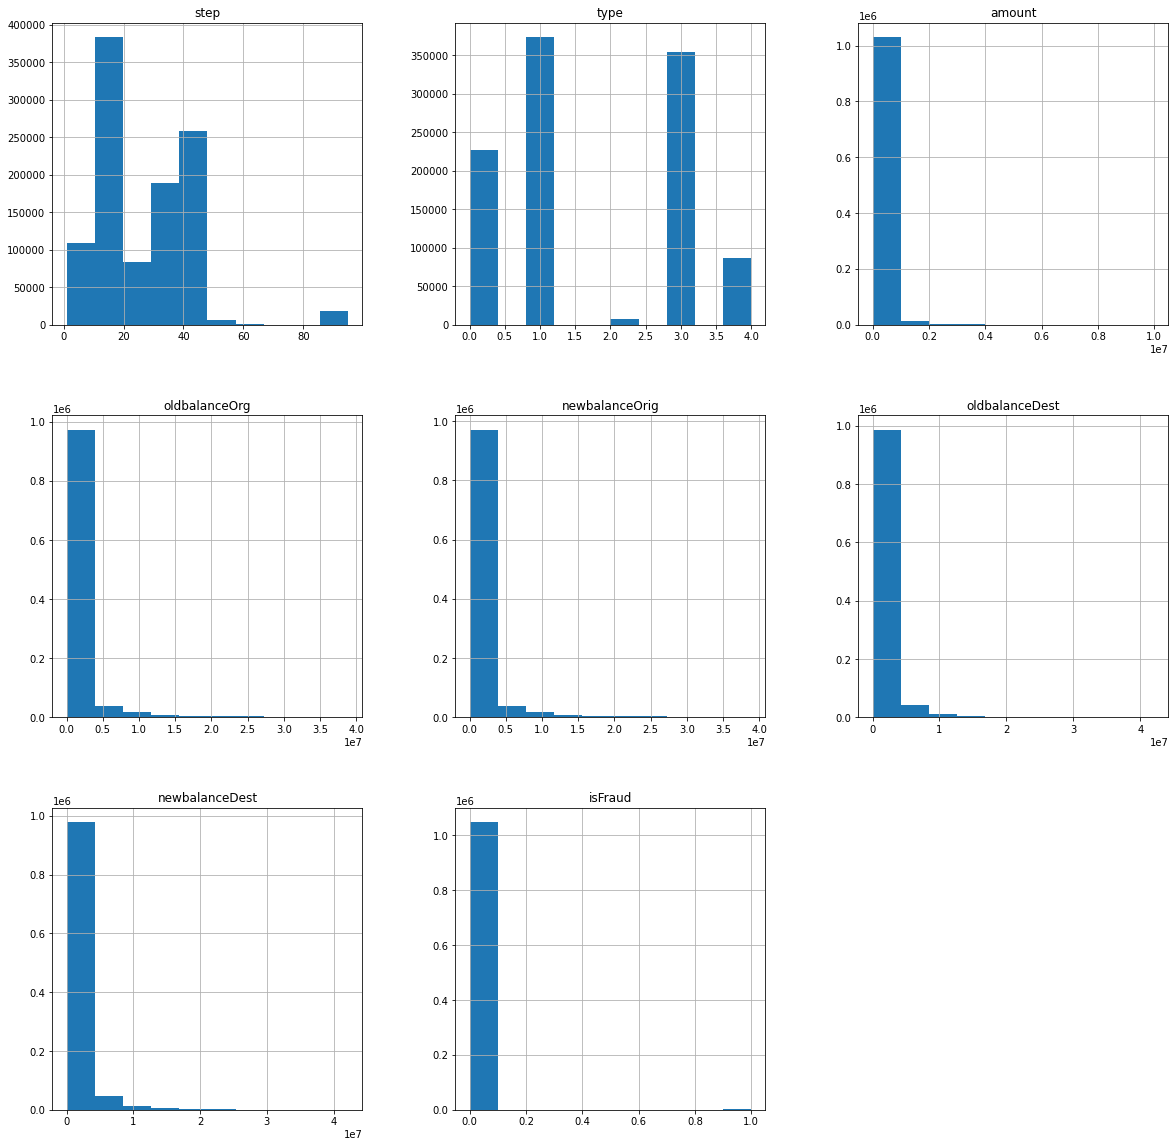

In [10]:
Dataset.hist(figsize=(20,20))
plt.show()

#(CORLISS, 2018)

### isFraud

The below uses the code from AMIN (2020) to show how unbalanced the fraudulent and nonfraudulent transactions are. There are 1,047,433 non fraudulent transactions and only 1,142 fraudulent ones. Only .11 transactions out of the whole dataset are fraudulent.

In [11]:
# Determing the number of fraud cases in dataset for each classification type

Fraud = Dataset[Dataset['isFraud'] == 1]
Valid = Dataset[Dataset['isFraud'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Dataset[Dataset['isFraud'] == 1])))
print('Valid Transactions: {}'.format(len(Dataset[Dataset['isFraud'] == 0])))

#(AMIN, 2020)

0.0010902845337124188
Fraud Cases: 1142
Valid Transactions: 1047433


In [12]:
# Below shows the breakdown between fraudulent and non-fraudulent transactions 

Dataset['isFraud'].value_counts(normalize=True)

#(AMIN, 2020)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

[0 1] [1047433    1142]


[]

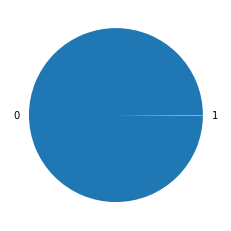

In [13]:
#Fraudent and non fraudulent transactions represented in a pie chart

lb, x = np.unique(Dataset['isFraud'], return_counts=True)
print(lb, x)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(x, labels=lb)
plt.plot()

### Type

Below I’m showing the  common number of transactions per data type. Cash_out and payment are the most used type of payment method follwed by debit.

In [14]:
# Determing number of fraud cases in the dataset per type

debit = Dataset[Dataset['type'] == 0]
cash_out = Dataset[Dataset['type'] == 1]
cash_in  = Dataset[Dataset['type'] == 2]
payment = Dataset[Dataset['type'] == 3]
transfer = Dataset[Dataset['type'] == 4]

print('debit: {}'.format(len(Dataset[Dataset['type'] == 0])))
print('cash_out: {}'.format(len(Dataset[Dataset['type'] == 1])))
print('cash_in: {}'.format(len(Dataset[Dataset['type'] == 2])))
print('payment: {}'.format(len(Dataset[Dataset['type'] == 3])))
print('transfer: {}'.format(len(Dataset[Dataset['type'] == 4])))


#(AMIN, 2020)

debit: 227130
cash_out: 373641
cash_in: 7178
payment: 353873
transfer: 86753


Below I’m using a scatter plot to compare the type of transactions to whether or not the transactions was fraudulent(1 = fraudulent, 0 = non-fraudulent). Non-fraudulent transactions uses all types of payment nethods, while fraudulent transactions only uses cash_out and transfer. It might be worth Barclays putting in extra verification steps for these types of transactions. 

<AxesSubplot:xlabel='isFraud', ylabel='type'>

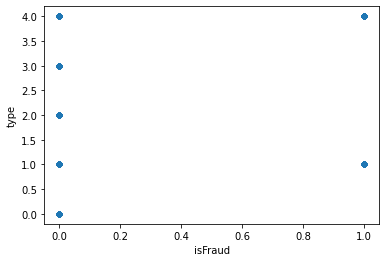

In [15]:
Dataset.plot.scatter(x='isFraud', y='type')

### Amount

We can see that most of the transactions are in the lower range with a few high transactions as the outliers since these amounts do not comply with the general behaviour of the rest of the dataset. I am not going to correct the outliers when using a random forest model.

[]

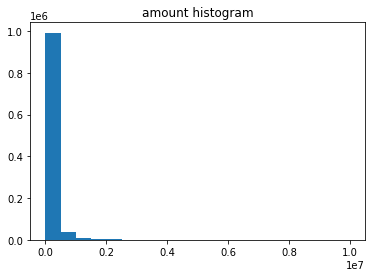

In [16]:
#Below shows the histogram for amount

plt.hist(Dataset['amount'], bins=20)
plt.title('amount histogram')
plt.plot()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Transaction Amounts')

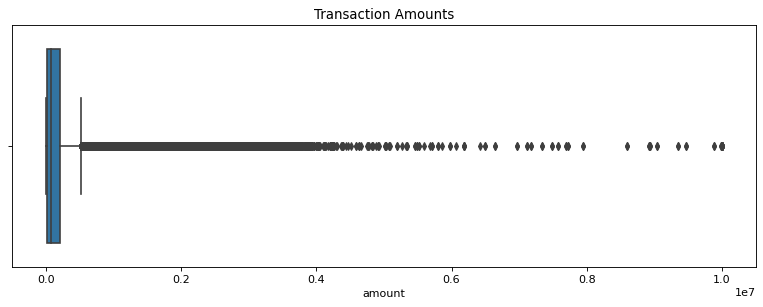

In [17]:
#Below shows a box plot for amount 

plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(Dataset['amount'])
plt.title('Transaction Amounts')

#(CORLISS, 2018)

Based on the below, and also visualised in the scatter plot, the amount of fraudulent transactions are higher than non-fraudulent transactions. The max non-fraudulent transaction amount is £10,000,000, while the largest non-fraudulent transaction amount is £6,419,835. In the scatter plot we can also see that 1 for fraudulent transactions is higher on the amount scale than non-fraudulent transactions. Maybe one way to prevent fraud is to put in checks on a transactions amount if it higher than a certain amount.

In [18]:
print("Amount details of fradulent transacation")
Fraud.amount.describe()

#(AMIN, 2020)

Amount details of fradulent transacation


count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [19]:
print("Amount details of valid transaction")
Valid.amount.describe()

#(AMIN, 2020)

Amount details of valid transaction


count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

<AxesSubplot:xlabel='amount', ylabel='isFraud'>

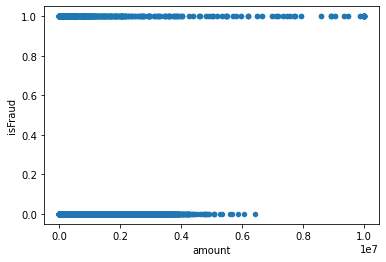

In [20]:
Dataset.plot.scatter(x='amount', y='isFraud')

# Data Prep Processing

The machine learning model will be as good as the quality of the data. This is why cleaning up and processing raw data before processing the machine learning model is essential in order to increase the quality of data.

## Dropping Useless Columns

Below I’m visualising the first 5 rows of the dataset and noticing that the useless columns of nameOrig and nameDest are still here. I am next going to drop these columns.

In [21]:
#This visualises the first 5 rows of the dataset
Dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [22]:
#Dropping nameOrig and nameDest
Dataset = Dataset.drop(columns=['nameOrig','nameDest'])

In [23]:
#Showing that nameOrig and nameDest have been dropped
Dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


## Null Values

Below I’m checking for missing values since missing value can bias the results of the machine learning models, as well reduce the accuracy of the model (LOPEZ-ROJAS, 2016). Once missing values are known there are various techniques to handle them, such as deleting the items with missing values or filling in the missing value using a statistical estimate. 

Luckily, as shown below my dataset does not have any missing values.

In [26]:
print(Dataset.isnull().sum())

#(CORLISS, 2018)

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [27]:
Dataset.isnull().any().any()

#(CORLISS, 2018)

False

## Normulaizing the Data

Normalization standardises the range of values. If a feature’s variance order of magnitude is more than the variance of other features, that particular feature might dominate other features in the dataset and cause problems (VINAYVIKRAM, 2020). This effects algorithms that use use Eucledian distance between two data points (VINAYVIKRAM, 2020). The random forest model should not be as affected as other models since tree based models are not distance based models and can handle varying ranges of features (VINAYVIKRAM, 2020). Though scaling the data for a random forest may not affect results as significantly as other algorithms, it is always recommended to implement standardization (Fernandez, 2021). 

Below we can look at the min and max for each column to see the variety in values. ‘Amount’ has the most, with the lowest value being £0.1 and the highest value being £10,000,000. 

In [28]:
# we use agashow the summary of descriptive statistics for each of the columns
print(Dataset.describe())

               step          type        amount  oldbalanceOrg  \
count  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean   2.696617e+01  1.713400e+00  1.586670e+05   8.740095e+05   
std    1.562325e+01  1.345007e+00  2.649409e+05   2.971751e+06   
min    1.000000e+00  0.000000e+00  1.000000e-01   0.000000e+00   
25%    1.500000e+01  1.000000e+00  1.214907e+04   0.000000e+00   
50%    2.000000e+01  1.000000e+00  7.634333e+04   1.600200e+04   
75%    3.900000e+01  3.000000e+00  2.137619e+05   1.366420e+05   
max    9.500000e+01  4.000000e+00  1.000000e+07   3.890000e+07   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06    1.048575e+06  1.048575e+06  
mean     8.938089e+05    9.781600e+05    1.114198e+06  1.089097e-03  
std      3.008271e+06    2.296780e+06    2.416593e+06  3.298351e-02  
min      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00    0.000000e+00  

In [29]:
# We see that we need to calculate the maximum and minimum values for each attibute
# This is done with functions min() and max()
column_max = Dataset.max()
column_min = Dataset.min()
print(column_max)
print('--------')
print(column_min)

step                    95.0
type                     4.0
amount            10000000.0
oldbalanceOrg     38900000.0
newbalanceOrig    38900000.0
oldbalanceDest    42100000.0
newbalanceDest    42200000.0
isFraud                  1.0
dtype: float64
--------
step              1.0
type              0.0
amount            0.1
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
dtype: float64


In [30]:
# and now we calculate the formula
Dataset_norm = (Dataset - column_min)/(column_max - column_min)

The below confirms that the values have now been normalized.

In [31]:
#confirming that the values have now been normalized
print(Dataset_norm.describe())

               step          type        amount  oldbalanceOrg  \
count  1.048575e+06  1.048575e+06  1.048575e+06   1.048575e+06   
mean   2.762359e-01  4.283499e-01  1.586669e-02   2.246811e-02   
std    1.662048e-01  3.362517e-01  2.649409e-02   7.639462e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    1.489362e-01  2.500000e-01  1.214897e-03   0.000000e+00   
50%    2.021277e-01  2.500000e-01  7.634323e-03   4.113625e-04   
75%    4.042553e-01  7.500000e-01  2.137618e-02   3.512648e-03   
max    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   

       newbalanceOrig  oldbalanceDest  newbalanceDest       isFraud  
count    1.048575e+06    1.048575e+06    1.048575e+06  1.048575e+06  
mean     2.297709e-02    2.323421e-02    2.640280e-02  1.089097e-03  
std      7.733345e-02    5.455535e-02    5.726524e-02  3.298351e-02  
min      0.000000e+00    0.000000e+00    0.000000e+00  0.000000e+00  
25%      0.000000e+00    0.000000e+00    0.000000e+00  

In [32]:
#confirming that the values have now been normalized
Dataset_norm.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.0,0.75,0.000984,0.004374,0.004121,0.000000,0.0,0.0
1,0.0,0.75,0.000186,0.000546,0.000498,0.000000,0.0,0.0
2,0.0,1.00,0.000018,0.000005,0.000000,0.000000,0.0,1.0
3,0.0,0.25,0.000018,0.000005,0.000000,0.000503,0.0,1.0
4,0.0,0.75,0.001167,0.001068,0.000768,0.000000,0.0,0.0


## Feature Engineering

Having too many features can cause the model to be less accurate. This is because each feature adds another dimension to the model. Removing unnecessary features leads to reduced computation costs, simplified models, and improved performance.

### Corelated Values

Correlation measures the strength of a relationship between two variables (Ganti, 2020). The value of 1 shows a perfect positive linear relationship, while the value of 0 shows no linear relationship. It is advised to remove one highly correlated features to remove redundancy.  

Below I am checking which values are correlated so that I can remove any unnecessary features. I can see that oldbalanceOrg and newbalanceOrig are highly correlated at .999047 and oldbalanceDest and newbalanceDest are highly correlated at .978403. This makes sense sine newbalanceDest and newbalanceOrig is the amount added onto the oldbalanceOrg and oldbalanceDest. 

In [33]:
Dataset_norm.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.015992,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030
type,0.015992,1.000000,0.042118,-0.339142,-0.351602,-0.166134,-0.127108,0.018859
amount,-0.025996,0.042118,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862
oldbalanceOrg,-0.006780,-0.339142,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829
newbalanceOrig,-0.007180,-0.351602,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438
oldbalanceDest,-0.002251,-0.166134,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552
newbalanceDest,-0.019503,-0.127108,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495
isFraud,0.045030,0.018859,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000


Below is a code taken from AMIN (2020) to visualizes the correlation data in the form of a heat map. We can see where the highly correlated items are between oldbalanceOrg and oldbalanceOrg, as well as oldbalanceDest and newbalanceDest. 

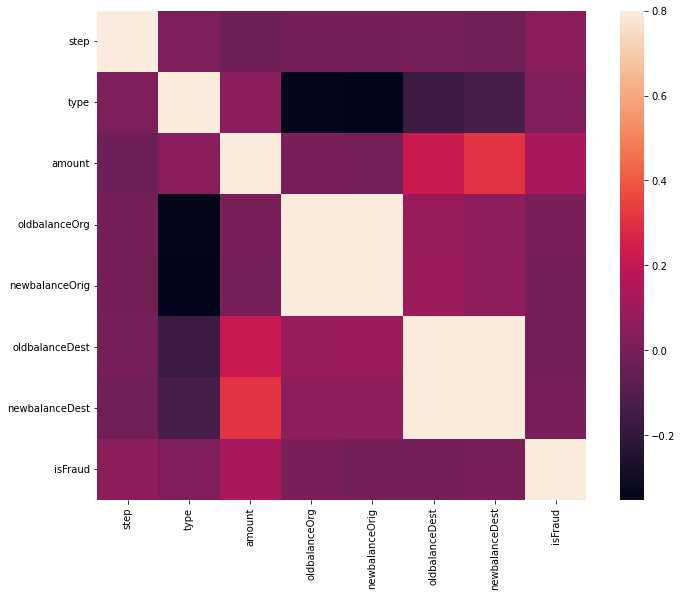

In [34]:
corrmat = Dataset_norm.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#(AMIN, 2020)

Below I am dropping the unnecessary correlated features. 

In [35]:
#dropping the unnecessary correlated features

Dataset_norm = Dataset_norm.drop(columns=['oldbalanceOrg','oldbalanceDest'])

Below I am confirming that the columns have indeed been dropped. I can see that oldbalanceOrg and oldbalanceDest have been dropped. 

In [36]:
# confirming the features have been dropped

Dataset_norm.head()

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud
0,0.0,0.75,0.000984,0.004121,0.0,0.0
1,0.0,0.75,0.000186,0.000498,0.0,0.0
2,0.0,1.00,0.000018,0.000000,0.0,1.0
3,0.0,0.25,0.000018,0.000000,0.0,1.0
4,0.0,0.75,0.001167,0.000768,0.0,0.0


### Mutual Information between Fraud and the Predictors

Below the aim is to use the mutual information method to estimate the mutual dependence between two variables (CORLISS, 2018). The higher the value indicates a higher dependence, with 0 indicating no dependence. This allows us to see the most important features in determining if an item is fraudulent or not.

We can see the variables most correlated with fraud are type, step, and amount. Since the other two are showing a relation to fraud and there are only 5 features I will keep the other two in.

In [37]:
from sklearn.model_selection import train_test_split

#seperating the X and the Y from the dataset
X = Dataset_norm.drop(labels='isFraud', axis=1) # Features
Y = Dataset_norm["isFraud"]               # Response

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

from sklearn.feature_selection import mutual_info_classif

mutual_infos = pd.Series(data=mutual_info_classif(X_train, Y_train, discrete_features=False, random_state=1), index=X_train.columns)
mutual_infos.sort_values(ascending=False)

#(CORLISS, 2018)

type              0.024991
step              0.005685
amount            0.001731
newbalanceOrig    0.000552
newbalanceDest    0.000026
dtype: float64

# Splitting the Dataset

In the below I’m splitting the data into training and testing. I’m going to train the model using the data from the training split, then in order to validate the data I am going to test the data using the unseen test data to see how well the model performed in in predicting fraudulent transactions. 

Since there is such a high imbalance with between fraudulent and non-fraudulent transactions (Fraud Cases: 1,142, Non-Fraudulent 1,047,433) I am going to split my train and test data based on the picture below. I am going to train the data with a 50/50 split between fraudulent and non-fraudulent transactions. Then test the data based on the highly imbalance fraudulent/non-fraudulent split, since this is how it is representative in the real world. The code in this section was provided by Dorian Gouzou (2022).

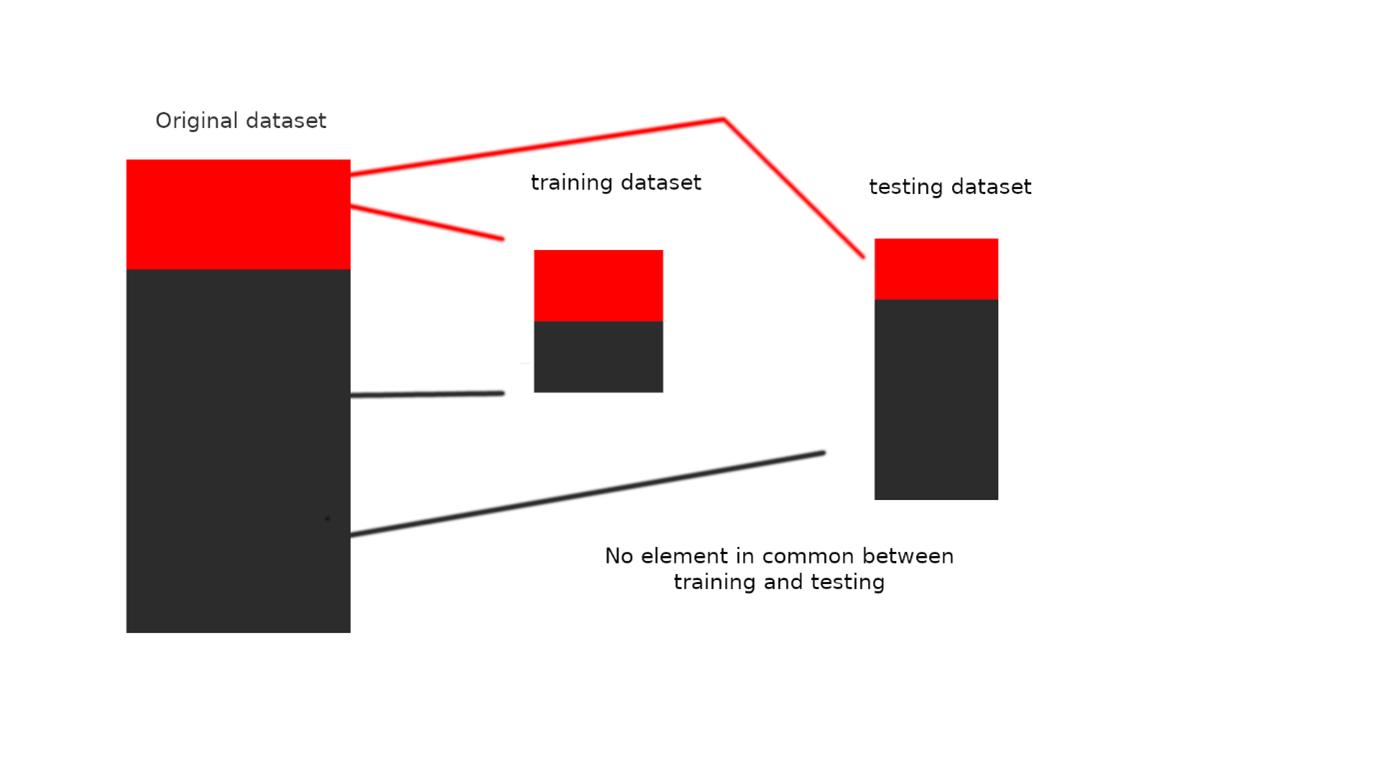

In [38]:
#Importing package
from sklearn.model_selection import StratifiedKFold

In [39]:
# fixing the randomness
import random
random.seed(42)
np.random.seed(42)
%matplotlib inline

In [40]:
#seperating the X and the Y from the dataset

x = Dataset_norm.drop(labels='isFraud', axis=1) # Features
y = Dataset_norm["isFraud"]               # Response

print(x.shape)
print(y.shape)
#getting just the values for the sake of processing (its a numpy array with no columns)
x=x.to_numpy()
y=y.to_numpy()

(1048575, 5)
(1048575,)


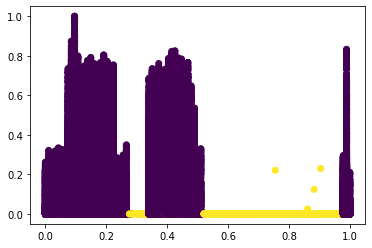

In [41]:
plt.scatter(x[:, 0], x[:, 2], c=y)
plt.show()

In [42]:
# shuffle the dataset
# keep the original data, by creating new arrays, x_s, and y_s
rng = np.random.default_rng(42)

shuffle = rng.permutation(len(y))
x_s = x[shuffle]
y_s = y[shuffle]

In [43]:
# create a stratified splitter from scikit-learn

# it will split the dataset in 2 part, keeping the same proportion of each
# class in each split
skf = StratifiedKFold(n_splits=2)
# the index of both dataset
train_index_0,  test_index = [i[0] for i in skf.split(x_s, y_s)]

In [44]:
# compute which class has the lowest occurence in the train dataset
lowest = np.min(np.unique(y_s[train_index_0], return_counts=True)[1])

In [45]:
# cut all the other class to the number of occurence of the least present class
# in the training dataset

# if there's 400 blue and 100 red, after this there will be 100 blue and 100 red
train_index = train_index_0[np.concatenate(
    [np.where(y_s[train_index_0] == i)[0][:lowest]
     for i in np.unique(y_s)])]

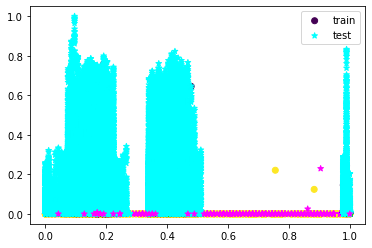

In [46]:
plt.scatter(x_s[train_index][:, 0], x_s[train_index][:, 2], c=y_s[train_index],
            label='train')
plt.scatter(x_s[test_index][:, 0], x_s[test_index][:, 2], c=y_s[test_index],
            cmap='cool', label='test', marker='*')
plt.legend()
plt.show()

# Implementing Random Forest

Random forest is a classification machine learning algorithm that is comprised of many decisions trees (Yiu, 2019). A decision tree is a map of the possible outcomes from a string of related choices that typically starts with a single node, which branches into possible outcomes where each of the outcomes leads to additional nodes, which branch off into other possibilities (Lucidchart, 2022). The goal of the decision tree is to predict the value of a target variable by learning simple decision rules inferred from the data features (Yiu, 2019). The advantage of using a decision tree is they are simple algorithms, very fast and easy to understand. The problem with using a decision tree is their performance is limited and can lead to bias and overfitting (IBM Cloud Education, 2020). This is where random forest comes into the picture. Random forest is an extension of a simple decision tree by using multiple decision trees to from an ensemble. An ensemble means that the random forest uses a combination multiple decision tree outputs to from different predictors (IBM Cloud Education, 2020). It builds decision trees on different samples and takes their majority vote for classification (E R, 2021).

## Hyperparameters

Hyperparameters are parameters that are explicitly defined by the user to control the learning process are set before training the algorithum (Brownlee, 2017). Random forest has 3 main hyper-parameters. These include node size, the number of trees, and the number of features sampled (IBM Cloud Education, 2020).

When testing the different hypermeters for this model the most accurate score came from keeping all default parameter values. See the parameter important auto scores below (Scikit-learn, 2018):

-	max_depth: int. The maximum depth of the trees. default=None
-	max_features: The number of features to look for when doing a split. Default=”sqrt”
-	n_estimators: The number of trees in the forest. Default =100

## Importing random forest classifier 

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# importing the random forest classifier algorithm function from sklearn
from sklearn.ensemble import RandomForestClassifier
# the random forest is stochastic, so we use a random_state parameter to fix the result
clf = RandomForestClassifier(random_state=42)

## Fit(X, Y)

In the below I’m using fit(X, Y) to fit the classifier model to the data. It will train a random forest based on it.
  - x_s[train_index]: The  data
  - y_s[train_index]: The data label

In [51]:
# random forest model creation
clf.fit(x_s[train_index], y_s[train_index])

RandomForestClassifier(random_state=42)

## Predict(X)

Below I'm using predict(X) to Predict the label of the data for x_s[test_index].

In [52]:
from sklearn.metrics import recall_score, confusion_matrix
y_pred = clf.predict(x_s[test_index])

## Score(X, Y)

Since I have a lot more False sample than True samples, I am using the recall (or sensitivity / True positive rate)to watch the results. Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class (Kreiger, 2020).

The below score measures how many labels the model got right out of the total number of predictions (Kreiger, 2020). This can be thought of as the percent of predictions that were correct.

Below I can see that the model has an accuracy score of 91%. Accuracy is not a good measure of classifier performance when classes are imbalanced (Kreiger, 2020). I would need more information to determine if the model really did perform well.

In [53]:
print(recall_score(y_s[test_index], y_pred))

# (Dorian Gouzou, 2022)

0.9124343257443083


## Confusion Matrix

A confusion matrix is a way to see how many of a classifier’s predictions were correct, and incorrect. The rows represent the true labels and the columns represent predicted labels.

-	True valid transactions – The model correctly classified 491,976 transactions as true valid transactions.
-	True fraud transactions – The model correctly classified 521 fraudulent transactions as fraudulent transactions.
-	False valid transactions – The model incorrectly classified 31,741 valid transactions as fraudulent transactions.
-	False fraud transactions – The model incorrectly classified 50 fraudulent transactions as valid transactions.


In [54]:
clf.fit(x_s[train_index], y_s[train_index])
res_p = clf.predict_proba(x_s[test_index])

In [55]:
print(confusion_matrix(y_s[test_index], y_pred))

[[491976  31741]
 [    50    521]]


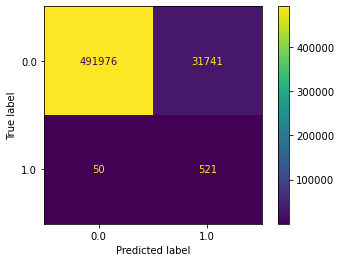

In [56]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, \
    recall_score, precision_score, ConfusionMatrixDisplay, RocCurveDisplay
ConfusionMatrixDisplay.from_predictions(y_s[test_index], y_pred)

# Conclusion

I was able to build a fairly accurate random forest machine learning model, with 91% accuracy in predicting fraudulent and non-fraudulent transactions. The feature that most correlated with a fraud or non-fraudulent transaction was the type of transaction followed by step, then amount. Though 91% is quite high, the confusion matrix showed that 3,000 non fraudulent cases were classified as fraudulent. This isn’t so bad since they were valid transactions, and it is worth double checking the transactions validity in order to prevent a fraudulent transaction from going through. Though there is wasted money and resources verifying these transactions when they are indeed valid. The concerning figure was the 50 fraudulent cases that were allowed through. The goal would be for this to be zero since it is extremely important that no fraudulent transactions are allowed, for the bank and customers benefit. Because a high number of fraudulent transactions were allowed through, I would say that this model was a good starting point but more data, training, and testing are needed to ensure that no fraudulent cases are allowed before this model should be implemented live. Whith more training/testing it may be possible to improve the random forest model by tweaking the hyperparameters given additional time and computational power.

# References

AMIN, H. (2020). Credit Card Fraud Detection using Random Forest. [online] kaggle.com. Available at: https://www.kaggle.com/code/hassanamin/credit-card-fraud-detection-using-random-forest/notebook [Accessed 11 Jun. 2022].

Barclays (2019). Who we are | Barclays. [online] Home.barclays. Available at: https://home.barclays/who-we-are/ [Accessed 11 Jun. 2022].

Brownlee, J. (2017). What is the Difference Between a Parameter and a Hyperparameter? [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/ [Accessed 21 Jun. 2022].

CORLISS, J. (2018). Detecting Fraud with Random Forest (MCC = 0.869). [online] kaggle.com. Available at: https://www.kaggle.com/code/pileatedperch/detecting-fraud-with-random-forest-mcc-0-869 [Accessed 11 Jun. 2022].

Dogga, Sudeep. (2020). THE ROLE OF RANDOM FOREST IN CREDIT CARD FRAUD ANALYSIS. Card Technology Today. 1. 5.

E R, S. (2021). Random Forest | Introduction to Random Forest Algorithm. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/ [Accessed 21 Jun. 2022].

Fernandez, J. (2021). How data normalization affects your Random Forest algorithm. [online] Medium. Available at: https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf [Accessed 11 Jun. 2022].

Freddygv (2014). python - How to change the order of DataFrame columns? [online] Stack Overflow. Available at: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns [Accessed 11 Jun. 2022].

Ganti, A. (2020). Correlation Coefficient Definition. [online] Investopedia. Available at: https://www.investopedia.com/terms/c/correlationcoefficient.asp#:~:text=The%20correlation%20coefficient%20is%20a [Accessed 12 Jun. 2022].

Geeksforgeeks (2021). How to convert categorical string data into numeric in Python? [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/#:~:text=We%20will%20be%20using%20. [Accessed 11 Jun. 2022].

Gouzou, D. (2022). MachineLearning/Undersampling_example.ipynb at main · VALE-lab-HWU/MachineLearning. [online] GitHub. Available at: https://github.com/VALE-lab-HWU/MachineLearning/blob/main/Undersampling_example.ipynb [Accessed 23 Jun. 2022].

IBM Cloud Education (2020). What is Random Forest? [online] www.ibm.com. Available at: https://www.ibm.com/cloud/learn/random-forest [Accessed 21 Jun. 2022].

Kreiger, J.R. (2020). Evaluating a Random Forest model. [online] Medium. Available at: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56 [Accessed 21 Jun. 2022].

Liu, C., Chan, Y., Alam Kazmi, S.H. and Fu, H. (2015). Financial Fraud Detection Model: Based on Random Forest. International Journal of Economics and Finance, 7(7). doi:10.5539/ijef.v7n7p178.

LOPEZ-ROJAS, E. (2016). Synthetic Financial Datasets For Fraud Detection. [online] www.kaggle.com. Available at: https://www.kaggle.com/datasets/ealaxi/paysim1 [Accessed 11 Jun. 2022].

Lucidchart (2022). Enterprise | Lucidchart. [online] www.lucidchart.com. Available at: https://www.lucidchart.com/pages/enterprise [Accessed 21 Jun. 2022].

Scikit-learn (2018). 3.2.4.3.1. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html [Accessed 21 Jun. 2022].

Singh, R. (2020). It’s all about Outliers. [online] Medium. Available at: https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309 [Accessed 11 Jun. 2022].

Srivastava, A. (2021). Let’s Talk about Random Forests! [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/lets-talk-about-random-forests-524ae1138d8b [Accessed 11 Jun. 2022].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=The%20problem%20of%20missing%20value [Accessed 11 Jun. 2022].

Worobec, K. (2021). FRAUD -THE FACTS 2021 THE DEFINITIVE OVERVIEW OF PAYMENT INDUSTRY FRAUD. [online] Available at: https://www.ukfinance.org.uk/system/files/Fraud%20The%20Facts%202021-%20FINAL.pdf [Accessed 22 Jun. 2022].

Yiu, T. (2019). Understanding Random Forest. [online] Medium. Available at: https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a [Accessed 21 Jun. 2022].

VINAYVIKRAM (2020). Why feature scaling is important? [online] kaggle.com. Available at: https://www.kaggle.com/code/vin1234/why-feature-scaling-is-important/notebook [Accessed 11 Jun. 2022].